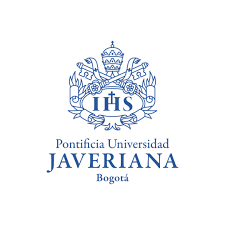

***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**
____________________________________________________

## Autor: Diego Alejandro Martínez Oviedo

## Carrera: Ciencia de Datos

## Semestre: 5

## Fecha: 23/04/2025

# **Objetivo**: Uso de MLLIB como Biblioteca IA en PySpark, para la creación de modelos de predicción.

## **Proyecto 2 Parcial**:
    
0. [Bibliotecas necesarias](#1)
1. [Carga y contenido de los datos (10%)](#2)
2. [Limpieza y Transformación de datos (15%)](#3)
3. [Visualización y Análisis de los datos (36%)](#4)
4. [Creación de Modelos: Regresión Lineal y Regresión Logística (12%)](#5)
5. [Conclusiones y Observaciones (30%)](#6)
6. [Referencias](#7)



<a id="1"></a>
## 0.- Bibliotecas necesarias

In [ ]:
!pip install pyspark findspark

## DESPUÉS DE INSTALAR SATISFACTORIAMENTE REINICIE EL KERNEL: Kernel-> Restart Kernel

In [ ]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.11/dist-packages/pyspark'

In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import findspark
findspark.init()

import pyspark

from pylab import *
from pyspark.sql.functions import input_file_name, mean, col, split, regexp_extract, when, lit, isnan, count, isnull, round
from pyspark.ml.feature import Imputer


from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F     #Permite creación de Funciones Creadas por el USUARIO
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
sqlContext = SQLContext(sc)

<a id="2"></a>
## 1.- Carga y contenido de los datos **10%**

**Actividades a realizar:**
- Carga de Datos a objeto spark Dataframe **2%**
- Muestra de objeto **2%**
- Descripción/Estadística por columnas **2%**
- Nombre de Columnas **2%**
- Tipos de Datos **2%**

In [ ]:
#Carga de Datos
datos = 'water_potability_Mod_A.csv'

#Objeto Dataframe spark
df00 = spark.read.csv(datos, header=True, inferSchema=True)

## Muestra de Datos, se observan las primeras 10 entradas
df00.show(10)

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|              NULL| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|              NULL| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
| 8.099124189298397|224.23625939355776|19909.541732292393| 9.275883602694089|   

### **Contenido de los Datos**

1. **pH:**
El PH es un parámetro importante para evaluar el equilibrio ácido-base del agua. También es el indicador del estado ácido o alcalino del agua.
- La OMS ha recomendado un límite máximo permisible de pH de 6,5 a 8,5.
3. **Hardness:**
La dureza "Hardness" está causada principalmente por las sales de calcio y magnesio. Estas sales se disuelven a partir de depósitos geológicos por los que pasa el agua. El tiempo que el agua está en contacto con el material que produce la dureza ayuda a determinar cuánta dureza hay en el agua bruta.
- La dureza se define originalmente como la capacidad del agua para precipitar el jabón causado por el calcio y el magnesio.
4. **Solids:**
Sólidos totales disueltos (TDS): El agua tiene la capacidad de disolver una amplia gama de minerales inorgánicos y algunos minerales orgánicos o sales como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos, etc. Estos minerales producen un sabor no deseado y diluyen el color en apariencia del agua. Este es un parámetro importante para el uso del agua. El agua con un alto valor de TDS indica que el agua está muy mineralizada.
- El límite deseable de TDS es de 500 mg/l y el límite máximo es de 1000 mg/l, prescrito para el consumo humano.
5. **Chloramines:**
El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de abastecimiento de agua. Las cloraminas se forman normalmente cuando se añade amoniaco al cloro para tratar el agua potable.
- Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.
6. **Sulfate:**
Los sulfatos son sustancias naturales que se encuentran en los minerales, el suelo y las rocas. Están presentes en el aire ambiente, las aguas subterráneas, las plantas y los alimentos. El principal uso comercial de los sulfatos es la industria química. La concentración de sulfato en el agua de mar es de unos 2.700 miligramos por litro (mg/L).
- Oscila entre 3 y 30 mg/L en la mayoría de los suministros de agua dulce, aunque en algunos lugares geográficos se encuentran concentraciones mucho más elevadas (1.000 mg/L).
7. **Conductivity:**
El agua pura no es un buen conductor de la corriente eléctrica, más bien es un buen aislante. El aumento de la concentración de iones aumenta la conductividad eléctrica del agua. Generalmente, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) mide en realidad el proceso iónico de una solución que le permite transmitir la corriente.
- Según las normas de la OMS, el valor de la CE no debe superar los 400 μS/cm.
8. **Organic_carbon:**
El carbono orgánico total (COT) de las aguas de origen procede tanto de la materia orgánica natural en descomposición (NOM) como de fuentes sintéticas. El COT es una medida de la cantidad total de carbono en compuestos orgánicos en el agua pura.
- Según la EPA de EE.UU., < 2 mg/L de COT en agua tratada/potable y < 4 mg/L en agua de origen que se utiliza para el tratamiento.
9. **Trihalomethanes:**
Los THM son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica del agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua tratada.
- Los niveles de THM de hasta 80 ppm se consideran seguros en el agua potable.
10. **Turbidity:**
La turbidez del agua depende de la cantidad de materia sólida presente en estado de suspensión. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad del vertido de residuos con respecto a la materia coloidal.
- El valor medio de turbidez presente es de 0,98 NTU (es inferior al valor recomendado por la OMS de 5,00 NTU).
11. **Potability:**
Indica si el agua es segura para el consumo humano, donde 1 significa Potable y 0 significa No potable.

In [ ]:
#Descripción resumen por columnas de los nombres respectivos de cada columna
df00.columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

Dado que no se observan caracteres raros dentro de los nombres de las columnas, no se hace ningún cambio a dichos nombres

In [ ]:
#se hace una exploración básica de datos viendo las medídas estadísticas por columna
for col in df00.columns:
  df00.describe([col]).show()

+-------+------------------+
|summary|                ph|
+-------+------------------+
|  count|              2785|
|   mean| 7.080794504276819|
| stddev| 1.594319518708812|
|    min|               0.0|
|    max|13.999999999999998|
+-------+------------------+

+-------+------------------+
|summary|          Hardness|
+-------+------------------+
|  count|              3276|
|   mean|196.36949601730177|
| stddev|32.879761476294185|
|    min|            47.432|
|    max|           323.124|
+-------+------------------+

+-------+-----------------+
|summary|           Solids|
+-------+-----------------+
|  count|             3276|
|   mean|22014.09252607711|
| stddev|8768.570827785921|
|    min| 320.942611274359|
|    max|61227.19600771213|
+-------+-----------------+

+-------+------------------+
|summary|       Chloramines|
+-------+------------------+
|  count|              3276|
|   mean| 7.122276793425787|
| stddev| 1.583084889039709|
|    min|0.3520000000000003|
|    max|13.12700000

In [ ]:
#Tipos de Datos
df00.dtypes

[('ph', 'double'),
 ('Hardness', 'double'),
 ('Solids', 'double'),
 ('Chloramines', 'double'),
 ('Sulfate', 'double'),
 ('Conductivity', 'double'),
 ('Organic_carbon', 'double'),
 ('Trihalomethanes', 'double'),
 ('Turbidity', 'double'),
 ('Potability', 'int')]

<a id="3"></a>
## 2.- Limpieza y transformación de datos  **15%**

**Actividades a realizar:**
- Tipo de datos y transformación, Cantidad total de registros, Tabla nulos **6%**
- Análisis y toma de decisiones sobre datos nulos **9%**
    - Si valor de datos nulos es menor (<10%) se eliminan
    - Caso contrario, valores que supera el 10% de datos nulos deben ser imputados por el promedio
- Descripción/Estadísticas por columnas **2%**

In [ ]:
# Tipos de datos

#se visualizan los tipos de datos para cada una de las columnas del dataset
df00.dtypes

[('ph', 'double'),
 ('Hardness', 'double'),
 ('Solids', 'double'),
 ('Chloramines', 'double'),
 ('Sulfate', 'double'),
 ('Conductivity', 'double'),
 ('Organic_carbon', 'double'),
 ('Trihalomethanes', 'double'),
 ('Turbidity', 'double'),
 ('Potability', 'int')]

Dado que los datos se exportan del dataset con los respectivos tipos de datos, no se realiza ningún tipo de limpieza de los datos y se dejan tal como están

In [ ]:
#Cantidad total de registros

#se define una variable auxiliar para guardar el número de filas
row_count = df00.count()

#se imprime el numero de filas
print(f"La cantidad de filas en el dataset es: {row_count}")


La cantidad de filas en el dataset es: 3276


Se puede observar que el total de registros del dataset es de 3276 filas

In [ ]:
#Tabla datos núlos o imposibles

#se importa la libreria necesaria para poder ver posteriormente los valores nulos
from pyspark.sql import functions as F

#se cuenta la cantidad de nulos por columna
df00.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df00.columns]).show()

+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
| ph|Hardness|Solids|Chloramines|Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
|491|       0|     0|          0|    781|           0|             0|            162|        0|         0|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+



Se puede observar que solo tres variables (columnas) presentan valores nulos, sin embargo, siguen siendo una cantidad considerable de registros nulos llegando hasta los 1434 valores nulos

In [ ]:
# Porcentaje de Datos Nulos por columnas
#Nota: Use la función para determinar el porcentaje de datos nulos por columnas

def porcentajeDatosNulosX_Columna(df):
    """
    Esta función toma un DataFrame de PySpark como entrada y devuelve un diccionario con
    columnas que tienen valores perdidos y el porcentaje de valores perdidos en cada columna.

    paramétro df: PySpark DataFrame
    retorna: DataFrame con los nombres de las columnas y el porcentaje de valores perdidos en cada columna
    """
    # Total de registros del dataframe
    total = df.count()

    # cantidad de datos nulos por columna
    df_nulos = df.agg(*[count(when(isnull(c) | isnan(c), c)).alias(c) for c in df.columns])

    # Colección a diccionario
    cant_nulos = df_nulos.collect()[0].asDict()

    # Calculo de porcentaje por columna y presentación en diccionario
    porcentajeNulos = {column: (value / total) * 100 for column, value in cant_nulos.items()}

    # Filtrar solo los valores nulos
    porcentajeNulos = {column: value for column, value in porcentajeNulos.items() if value > 0}

    porcentajeNulos = spark.createDataFrame([(k, v) for k, v in porcentajeNulos.items()], ["Columnas","Porciento_Nulos"])
    porcientoNulos = porcentajeNulos.withColumn("Porciento_Nulos", round(porcentajeNulos["Porciento_Nulos"], 2))
    porcientoNulos = porcientoNulos.sort("Porciento_Nulos", ascending=False)

    return porcientoNulos

In [ ]:
#Presente la tabla Porcentaje valores nulos

#se realiza una variable auxiliar para tomar la cantidad de valores nulos por columna representados en procentaje
valoresNulos = porcentajeDatosNulosX_Columna(df00)

valoresNulos.show()

+---------------+---------------+
|       Columnas|Porciento_Nulos|
+---------------+---------------+
|        Sulfate|          23.84|
|             ph|          14.99|
|Trihalomethanes|           4.95|
+---------------+---------------+



se puede observar que de las columnas que poseen datos nulos, solo "Trihalomethanes" es menor a 10%, las demás ("Sulfate, "ph") tienen valores mayres al 10%

In [ ]:
#Eliminar datos que el promedio sea menor al 10%

#se crea una tabla para poder hacer solicitudes SQL
df00.createOrReplaceTempView("df01")

#Se hace la consulta, que retorna el df00 con la(s) columnas, donde los valores menores al 10% nulos son eliminados, para esto se toma en cuenta la variable "ValoresNulos"
df01 = spark.sql("SELECT * FROM df01 WHERE Trihalomethanes IS NOT NULL")


#Se verifica la eliminación
show = df01.show()

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|              NULL| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|              NULL| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
| 8.099124189298397|224.23625939355776|19909.541732292393| 9.275883602694089|   

dado que solo la columna con nulos "Trihalomethanes" tiene valores nulos menores al 10% se procede a eliminar dichos valores de los datos

In [ ]:
row_count = df01.count()

#se imprime el numero de filas para observar la cantidad de registros que fueron eliminados
print(f"La cantidad de filas en el dataset es: {row_count}")

La cantidad de filas en el dataset es: 3114


In [ ]:
#Imputar valores que superen umbral del 10% de datos nulos por el promedio, en otros términos, se procede a rellenar valores nulos con medidas estadísticas

# Inicializar el Imputador
imputador = Imputer(
    inputCols= df01.columns, #Nombres de las columnas del dataframe spark
    outputCols=df01.columns, #Nombre de las columnas del dataframe spark <salida>
    strategy="mean"          # valor a imputar por NULO <puede ser mediana, o cualquier medida de tendencia central>
)

#Ajustar el imputador
modelo = imputador.fit(df01)

#Imputar el dataframe <valores nulos por columnas que superen el umbral del 10%>
df02 = modelo.transform(df01)

#Verificación de la imputación de los nulos
df02.show(10)

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
| 7.080149389109641| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862| 333.6420045459063| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
| 8.099124189298397|224.23625939355776|19909.541732292393| 9.275883602694089| 33

In [ ]:
row_count = df02.count()

#se imprime el numero de filas para observar la cantidad de registros que tiene el dataset
print(f"La cantidad de filas en el dataset es: {row_count}")

La cantidad de filas en el dataset es: 3114


In [ ]:
#Tabla datos núlos o imposibles

#se importa la libreria necesaria para poder ver posteriormente los valores nulos
from pyspark.sql import functions as F

#se cuenta la cantidad de nulos por columna
df02.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df00.columns]).show()

+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
| ph|Hardness|Solids|Chloramines|Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
|  0|       0|     0|          0|      0|           0|             0|              0|        0|         0|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+



Se puede observar que la imputación fue realizada correctamente, esto dado que ya no se poseen valores nulos en el nuevo dataset

* Se presenta información estadística de las columnas, esto dado a que fueron eliminadas columnas, y lo mejor es volver a observar las medidas estadísticas, pero con la nueva cantidad de datos

In [ ]:
#se hace una exploración básica de datos viendo las medídas estadísticas por columna
for col in df00.columns:
  df00.describe([col]).show()


+-------+------------------+
|summary|                ph|
+-------+------------------+
|  count|              2785|
|   mean| 7.080794504276819|
| stddev| 1.594319518708812|
|    min|               0.0|
|    max|13.999999999999998|
+-------+------------------+

+-------+------------------+
|summary|          Hardness|
+-------+------------------+
|  count|              3276|
|   mean|196.36949601730177|
| stddev|32.879761476294185|
|    min|            47.432|
|    max|           323.124|
+-------+------------------+

+-------+-----------------+
|summary|           Solids|
+-------+-----------------+
|  count|             3276|
|   mean|22014.09252607711|
| stddev|8768.570827785921|
|    min| 320.942611274359|
|    max|61227.19600771213|
+-------+-----------------+

+-------+------------------+
|summary|       Chloramines|
+-------+------------------+
|  count|              3276|
|   mean| 7.122276793425787|
| stddev| 1.583084889039709|
|    min|0.3520000000000003|
|    max|13.12700000

<a id="4"></a>
## 3.- Análisis y Visualización de los datos  **36%**

**Actividades a realizar:**
- Crear una tabla de vista temporal y el vector por cada parámetro
- Graficar y Analizar cada parámetro **4% por parámetro**

In [ ]:
#Nombre de las columnas
#Descripción resumen por columnas de los nombres respectivos de cada columna
df02.columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
#Creación de tablas con datos limpios para visualizar los datos
df02.createOrReplaceTempView("df03") #creación de la tabla
df03 = spark.sql("SELECT * FROM df03 WHERE ph IS NOT NULL AND Hardness IS NOT NULL AND Solids IS NOT NULL AND Chloramines IS NOT NULL AND Sulfate IS NOT NULL AND Conductivity IS NOT NULL AND Organic_carbon IS NOT NULL AND Trihalomethanes IS NOT NULL AND Turbidity IS NOT NULL AND Potability IS NOT NULL") #consulta tipo SQL

In [ ]:
#Hacer los vectores de la tabla para cada parámetro
ph_Parametro = spark.sql("SELECT ph FROM df03") #consulta tipo SQL a la tabla creada anteriormente
ph_Parametro = ph_Parametro.rdd.map(lambda fila: fila.ph).collect()
Hardness_Parametro = spark.sql("SELECT Hardness FROM df03")
Hardness_Parametro = Hardness_Parametro.rdd.map(lambda fila: fila.Hardness).collect()
Solids_Parametro = spark.sql("SELECT Solids FROM df03")
Solids_Parametro = Solids_Parametro.rdd.map(lambda fila: fila.Solids).collect()
Chloramines_Parametro = spark.sql("SELECT Chloramines FROM df03")
Chloramines_Parametro = Chloramines_Parametro.rdd.map(lambda fila: fila.Chloramines).collect()
Sulfate_Parametro = spark.sql("SELECT Sulfate FROM df03")
Sulfate_Parametro = Sulfate_Parametro.rdd.map(lambda fila: fila.Sulfate).collect()
Conductivity_Parametro = spark.sql("SELECT Conductivity FROM df03")
Conductivity_Parametro = Conductivity_Parametro.rdd.map(lambda fila: fila.Conductivity).collect()
Organic_carbon_Parametro = spark.sql("SELECT Organic_carbon FROM df03")
Organic_carbon_Parametro = Organic_carbon_Parametro.rdd.map(lambda fila: fila.Organic_carbon).collect()
Trihalomethanes_Parametro = spark.sql("SELECT Trihalomethanes FROM df03")
Trihalomethanes_Parametro = Trihalomethanes_Parametro.rdd.map(lambda fila: fila.Trihalomethanes).collect()
Turbidity_Parametro = spark.sql("SELECT Turbidity FROM df03")
Turbidity_Parametro = Turbidity_Parametro.rdd.map(lambda fila: fila.Turbidity).collect()
Potability_Parametro = spark.sql("SELECT Potability FROM df03")
Potability_Parametro = Potability_Parametro.rdd.map(lambda fila: fila.Potability).collect()

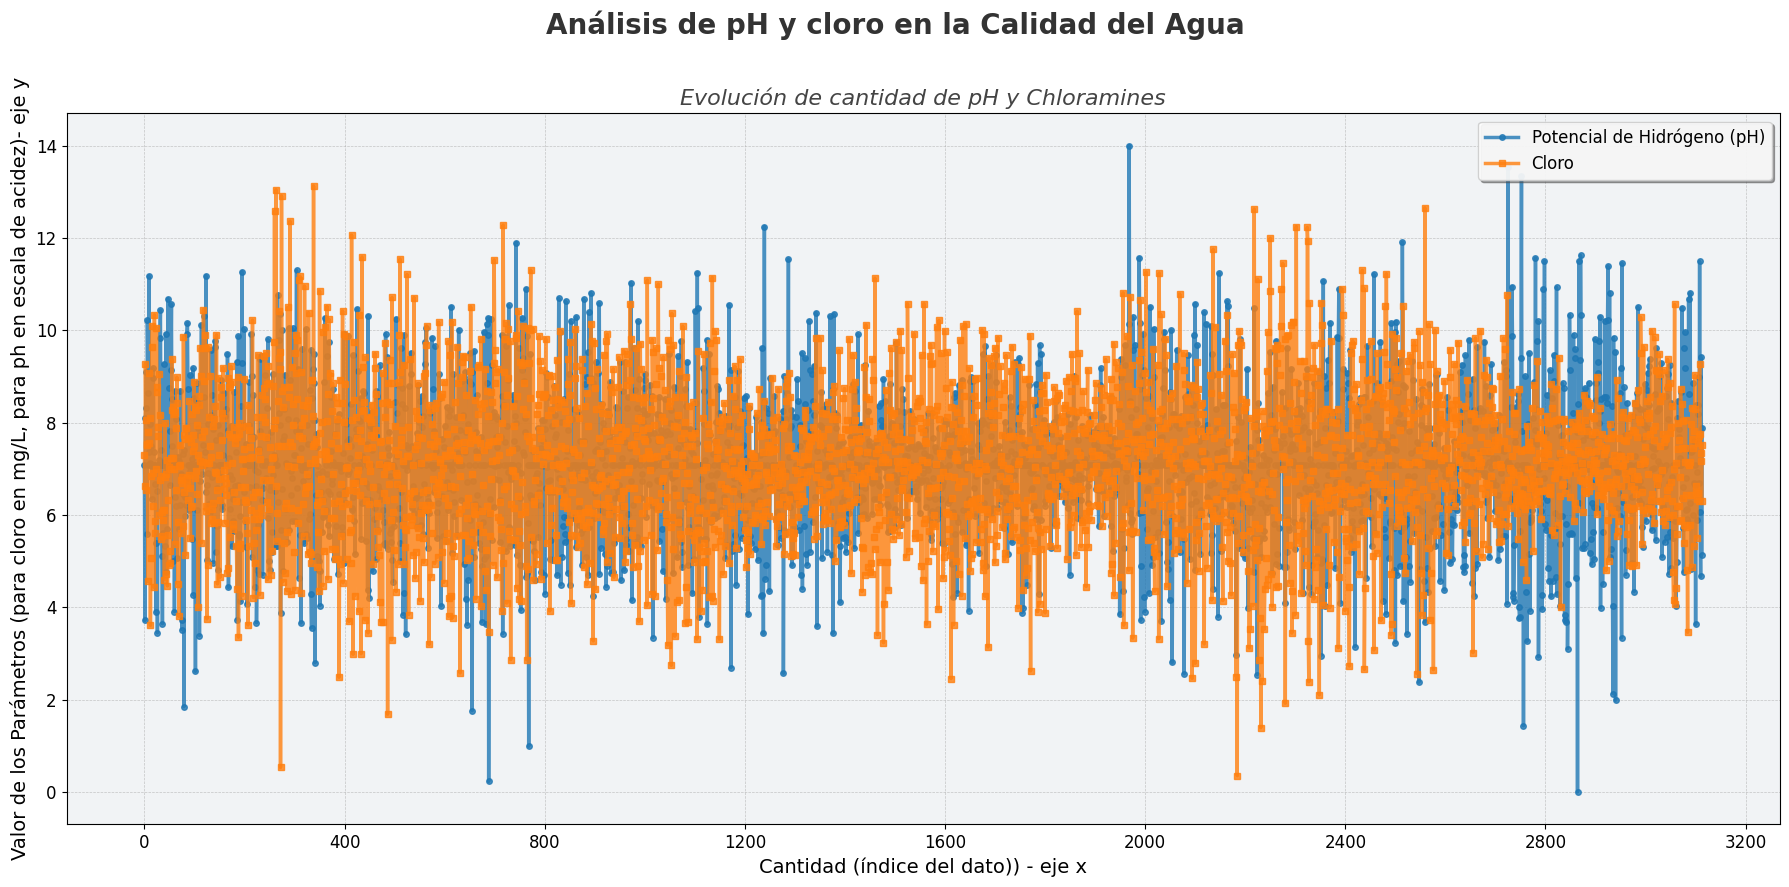

In [ ]:
## Grafica parámetro ph: magnitud X, Y
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Tamaño de los datos
tam = len(ph_Parametro)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(18, 9), dpi=100, facecolor='#f8f9fa')

# Graficar los datos con estilo
ax.plot(range(tam), ph_Parametro, label='Potencial de Hidrógeno (pH)', linewidth=2.5,
        color='#1f77b4', marker='o', markersize=4, alpha=0.8)
ax.plot(range(tam), Chloramines_Parametro, label='Cloro', linewidth=2.5,
        color='#ff7f0e', marker='s', markersize=4, alpha=0.8)

# Título principal
fig.suptitle('Análisis de pH y cloro en la Calidad del Agua',
             fontsize=20, fontweight='bold', color='#333333')

# Subtítulo (eje)
ax.set_title('Evolución de cantidad de pH y Chloramines', fontsize=16, style='italic', color='#444444')

# Etiquetas de ejes
ax.set_xlabel('Cantidad (índice del dato)) - eje x', fontsize=14)
ax.set_ylabel('Valor de los Parámetros (para cloro en mg/L, para ph en escala de acidez)- eje y', fontsize=14)

# Leyenda
ax.legend(fontsize=12, loc='upper right', shadow=True, fancybox=True, framealpha=0.9)

# Configuración de ejes
ax.tick_params(axis='both', labelsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # solo enteros

# Cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Estilo general
ax.set_facecolor('#f1f3f5')  # fondo gris claro del área de gráfico
fig.patch.set_facecolor('#ffffff')  # fondo blanco del lienzo

# Ajustar márgenes
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [ ]:
#correlación entre las variables
correlacion = df03.corr("ph", "Chloramines")
print(correlacion)


-0.029594116518083247


Al hacer un análsis de tiempo entre las variables cloro y ph (escogidas para el análisis por sus similitudes de valores estadísticos), se puede observar que ambas variables tiene comportamientos muy similares, sin embargo, se puede ver una ligera tendencia a haber un mayor ph cuando el cloro disminuye, como se puede observar en los valores que se encuentran entre 1200 y ~1500, y los valores enre 2800 y ~3100, esto se puede corroborar al ver la correlación entre las variables, la cual es -0.2, lo que indica una correlación negativa

<a id="5"></a>
## 4.- Creación de Modelos: Regresión Lineal y Regresión Logística **12%**

**Actividades a realizar:**
- Separar los datos aleatoriamente (80%:entrenamiento, 20%:prueba)
- Crear un vector ensamblador con las columnas los parámetros
- LinearRegression: crear el modelo A
- Crear "pipeline" para el modelo A {etapas: vEnsamblador, modelo_A}
- Entrenar el modelo A
- Obtener las predicciones con los datos de prueba y mostrar
- Revisa el rendimiento del modeloA con el área AUC **6%**
- LogisticRegression: crear el modelo B
- Crear "pipeline" para el modelo B {etapas: vEnsamblador, modelo_B}
- Entrenar el modelo B
- Obtener las predicciones con los datos de prueba y se muestran
- Revisa el rendimiento del modelo B con el área AUC **6%**

In [ ]:
df02.columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
#importar la biblioteca
from pyspark.ml.feature import VectorAssembler
#Vector ensamblador para la creación de la columna features
df04 = df03.withColumn("qrph", F.when((F.col("ph") >= 6.5) & (F.col("ph") <= 8.5), 1).otherwise(0))
df04 = df04.withColumn("qrSolids", F.when((F.col("Solids") >= 500) & (F.col("Solids") <= 1000), 1).otherwise(0))
df04 = df04.withColumn("qrChloramines", F.when((F.col("Chloramines") <= 4), 1).otherwise(0))
df04 = df04.withColumn("qrSulfate", F.when((F.col("Sulfate") >= 3) & (F.col("Sulfate") <= 30), 'suministro agua dulce normal').
                       when((F.col("pH") > 30) & (F.col("pH") <= 1000), 'suministro de agua dulce elevado').
                       when((F.col("pH") > 1000) & (F.col("pH") <= 2700), 'suministro agua de mar').otherwise(0))
df04 = df04.withColumn("qrConductivity", F.when((F.col("Conductivity") <= 400), 1).otherwise(0))
df04 = df04.withColumn("qrOrganic_carbon", F.when((F.col("Organic_carbon") < 2), 'agua tratada').
                       when((F.col("Organic_carbon") < 4), 'agua tratamiento').otherwise(0))
df04 = df04.withColumn("qrPotability", F.when((F.col("Potability") == 1), 'potable').
                       when((F.col("Potability") == 0), 'no potable').otherwise(0))


In [ ]:
df04 = df04.withColumn("wph", df04.qrph*0.05)
df04 = df04.withColumn("wpSolids", df04.qrSolids*0.05)
df04 = df04.withColumn("wpChloramines", df04.qrChloramines*0.05)
df04 = df04.withColumn("wpConductivity", df04.qrConductivity*0.05)
df04 = df04.withColumn("wpSulfate", df04.Sulfate*0.05)


In [ ]:
df04.columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability',
 'qrph',
 'qrSolids',
 'qrChloramines',
 'qrSulfate',
 'qrConductivity',
 'qrOrganic_carbon',
 'qrPotability',
 'wph',
 'wpSolids',
 'wpChloramines',
 'wpConductivity',
 'wpSulfate']

In [ ]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Assuming df02 is your PySpark DataFrame
pandasDF = df02.toPandas()

# Selecting features (columns 0 to 9) and target (column 'Potability')
# Adjusted column indices to select the correct features and target variable
datos = pandasDF.iloc[:, 0:9].values
predecir = pandasDF.iloc[:, 9].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    datos, predecir, test_size=0.2, random_state=1
)

# Converting to TensorFlow tensors for compatibility
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Define the Keras model
# Adjusted input_dim to 9 to match the number of features
modelo_DL = Sequential()
modelo_DL.add(Dense(350, input_dim=9, activation="relu"))
modelo_DL.add(Dense(350, activation="relu"))
modelo_DL.add(Dense(350, activation="relu"))
# Output layer with 1 node for binary classification
modelo_DL.add(Dense(1, activation="sigmoid"))

# Compile the model
# Using binary_crossentropy loss for binary classification
modelo_DL.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
rendimiento_modelo = modelo_DL.fit(X_train, y_train, epochs=50, batch_size=81)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5385 - loss: 409.7525
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4981 - loss: 137.1250
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5274 - loss: 29.2577
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5272 - loss: 25.7170
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5160 - loss: 23.8126
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5269 - loss: 12.4304
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4806 - loss: 12.4679
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5332 - loss: 9.3821
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4979 - loss: 11.9112
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5401 - loss: 7.6572
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5259 - loss: 1.4184
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0

In [ ]:
#se calcula la predicción
prediccion_DL_Train = modelo_DL.predict(X_train)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


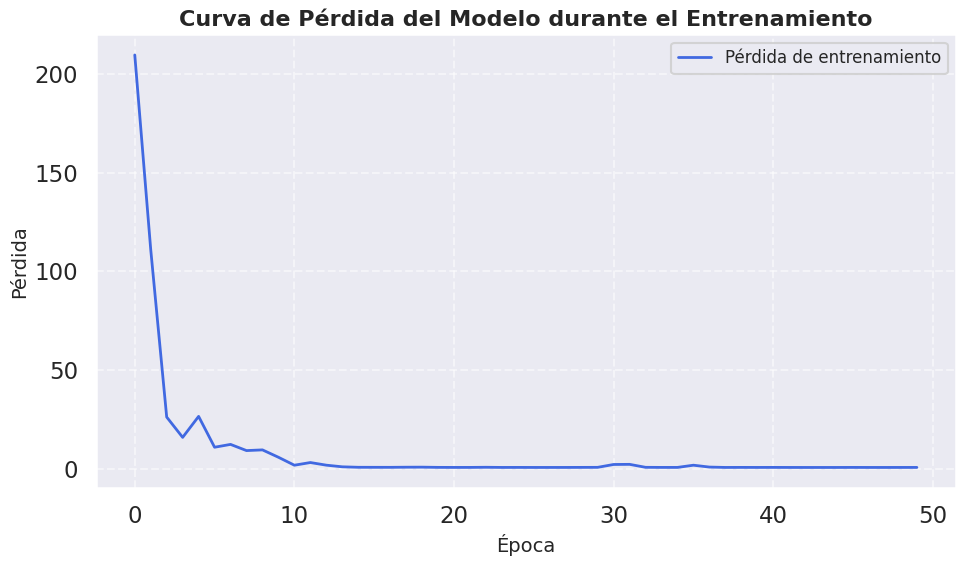

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="darkgrid", context="talk")

# Tamaño de figura
plt.figure(figsize=(10, 6))

# Gráfico de la pérdida
plt.plot(rendimiento_modelo.history['loss'], color='royalblue', linewidth=2, label='Pérdida de entrenamiento')


# Títulos y etiquetas
plt.title('Curva de Pérdida del Modelo durante el Entrenamiento', fontsize=16, fontweight='bold')
plt.xlabel('Época', fontsize=14)
plt.ylabel('Pérdida', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()


<a id="6"></a>
## 5.- Conclusiones y Observaciones **30%**

**Actividades**
- Escribir sus observaciones personales **10%**
- Escribir las conclusiones del 2do parcial **20%**

In [ ]:
#Observaciones, muy poco tiempo para el desarrollo del parcial

In [ ]:
#Spark sirve muy bien para la limpieza de datos
#Spark sirve muy bien para el desarrollo y entre de modelos
#permite visualizar de buena manera el contenido de los dataset
#permite realizar evaluaciones y análisis de los datos

<a id="7"></a>
## **6.- Referencias**

* **[1]** Spellman FR. Handbook of Water and Wastewater Treatment Plant Operations. 3rd ed. Boca Raton: CRC Press; 2013.
* **[2]** Summer Kevin. [Water Quality](https://www.intechopen.com/chapters/69568). IntechOpen; DOI 978-1-78985-578-4.2020.
* **[3]** Hammer MJ. Water and Wastewater Technology. 7th ed. Upper Saddle River: Pearson education; 2011.
* **[4]** Tchobanoglous G, Burton FL, Stensel HD. Metcalf & Eddy Wastewater Engineering: Treatment and Reuse. 4th ed. New Delhi: Tata McGraw-Hill Limited; 2003.
* **[5]** Alley ER. Water Quality Control Handbook. Vol. 2. New York: McGraw-Hill; 2007.

* **[6]** Nathanson JA. Basic Environmental Technology: Water Supply. New Delhi: Printice-Hall of India; 2004

